# Uses Scheme 2, D = 1, $\Delta t = 0.02$

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("CS_paper")

from matplotlib import animation
from IPython.display import HTML

# define the contour levels
phi_levels = np.linspace(0., 1.6, 400)

In [2]:
weight_1d_temp = np.loadtxt("delta_func_1d_18.dat")
weight_2d_temp = np.loadtxt("delta_func_2d_18.dat")

h = 0.1
D = 1.
rho = 60**2/6**2

t_0 = 2. * h**2 / (4.*D)

In [3]:
t_list = np.unique(weight_1d_temp[:,0])
nt = len(t_list)
nx = int(len(weight_1d_temp[:,0])/nt)

weight_1d = weight_1d_temp[:,1].reshape(nt, nx)
weight_2d = weight_2d_temp[:,1].reshape(nt, nx, nx)

In [4]:
x_pts = np.linspace(-2., 2., nx)
A = 10./(2.*np.pi * h**2) * 1./rho

weight_1d_exact = np.zeros((nt, nx))
for idt, t in enumerate(t_list):
    for idx, x in enumerate(x_pts):
        weight_1d_exact[idt, idx] = A * (t_0/(t+t_0)) \
                        * np.exp(-x**2/(4. * D * (t_0+t)))

<IPython.core.display.Javascript object>


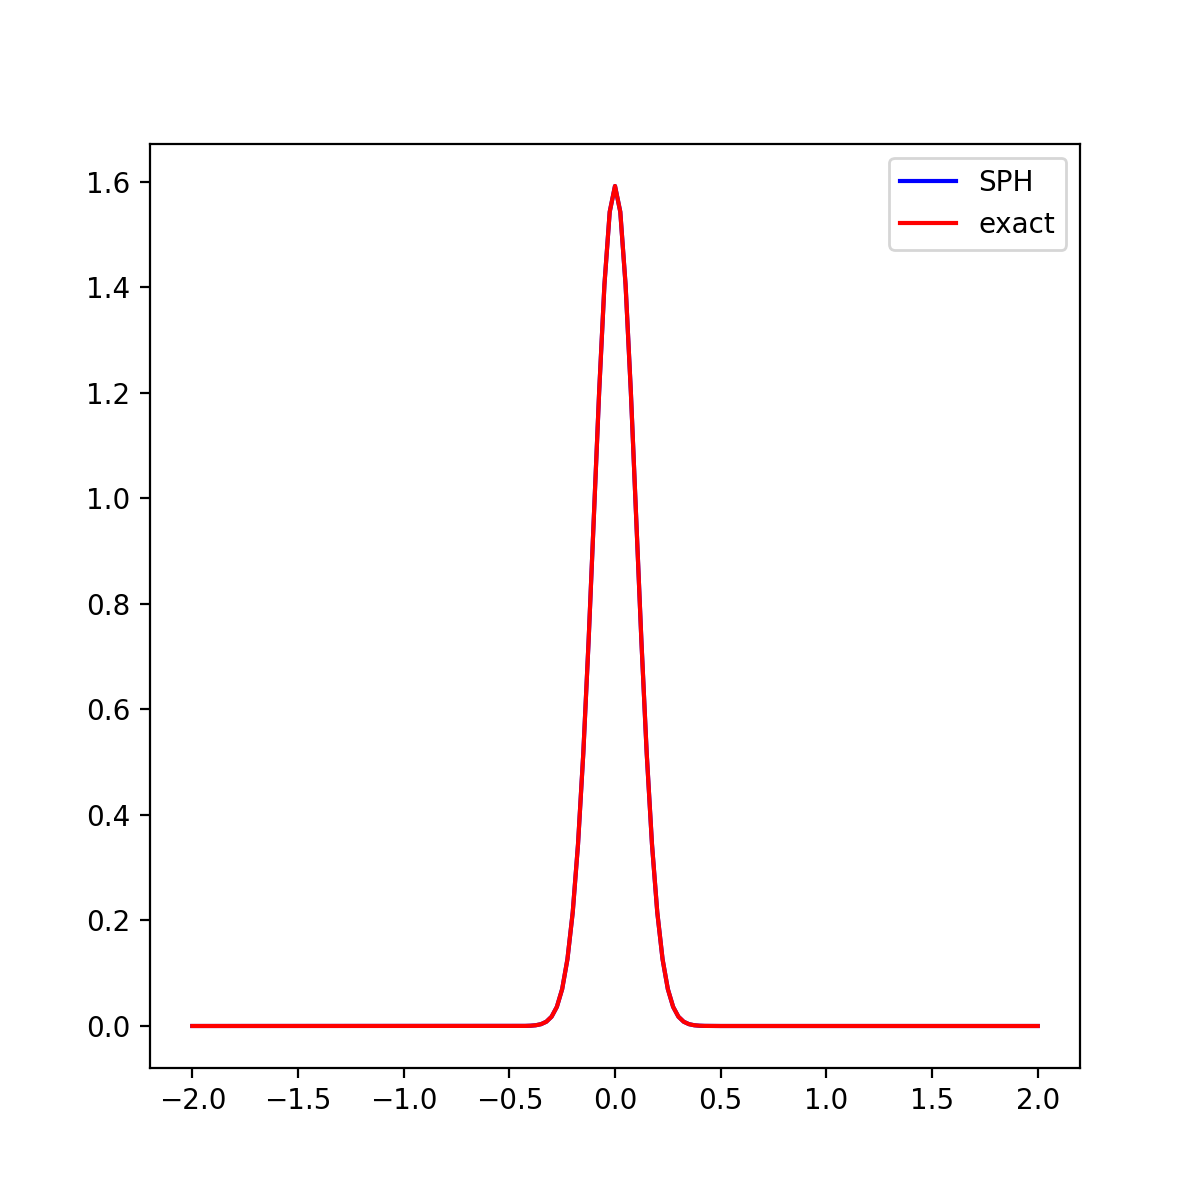

In [5]:
fig1 = plt.figure(figsize=(6, 6))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x_pts, weight_1d[0,:], color='blue', label="SPH")
ax1.plot(x_pts, weight_1d_exact[0,:], color='red', label="exact")
ax1.legend()
fig1.savefig('delta_func_init_1d_18.png', bbox_inches='tight', dpi = 200.)

<IPython.core.display.Javascript object>


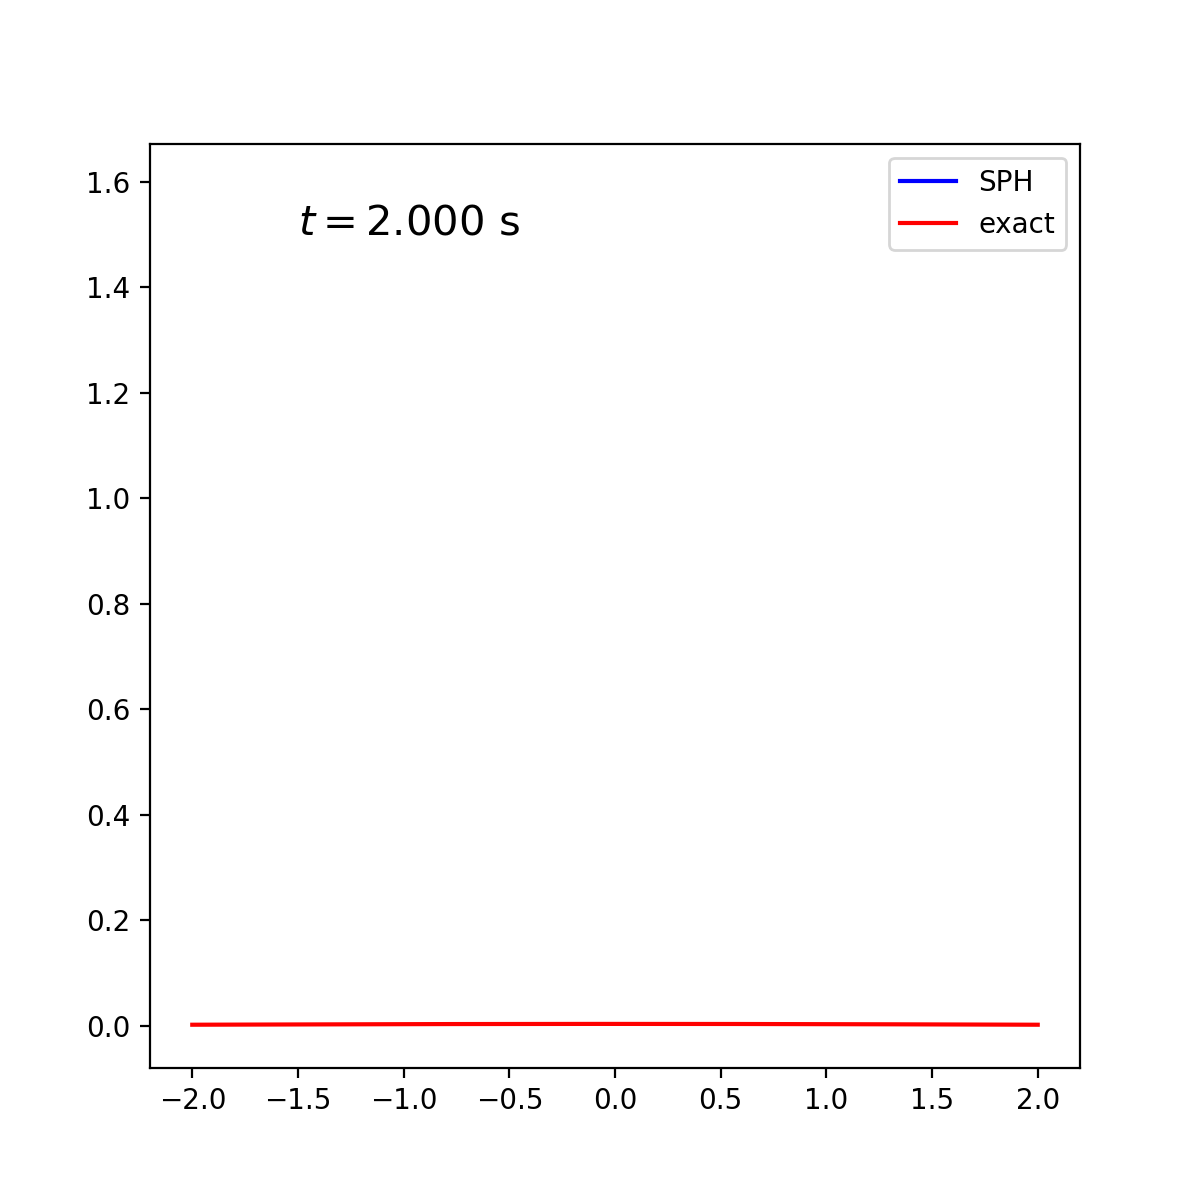

In [6]:
fig_anim = plt.figure(figsize=(6, 6))
ax_anim = fig_anim.add_subplot(1,1,1)
plot1, = ax_anim.plot(x_pts, weight_1d[0,:], color='blue', label="SPH")
plot2, = ax_anim.plot(x_pts, weight_1d_exact[0,:], color='red', label="exact")
time_text = ax_anim.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim.legend()

def animate(i):
    global plot1, plot2
    plot1.set_data(x_pts, weight_1d[i,:])
    plot2.set_data(x_pts, weight_1d_exact[i,:])
    
    time_text.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    
    return (plot1,), (plot2,), time_text

anim = animation.FuncAnimation(fig_anim, animate, frames=nt, repeat=False)
anim.save('delta_func_anim_1d_18.mp4', fps=10)

<IPython.core.display.Javascript object>


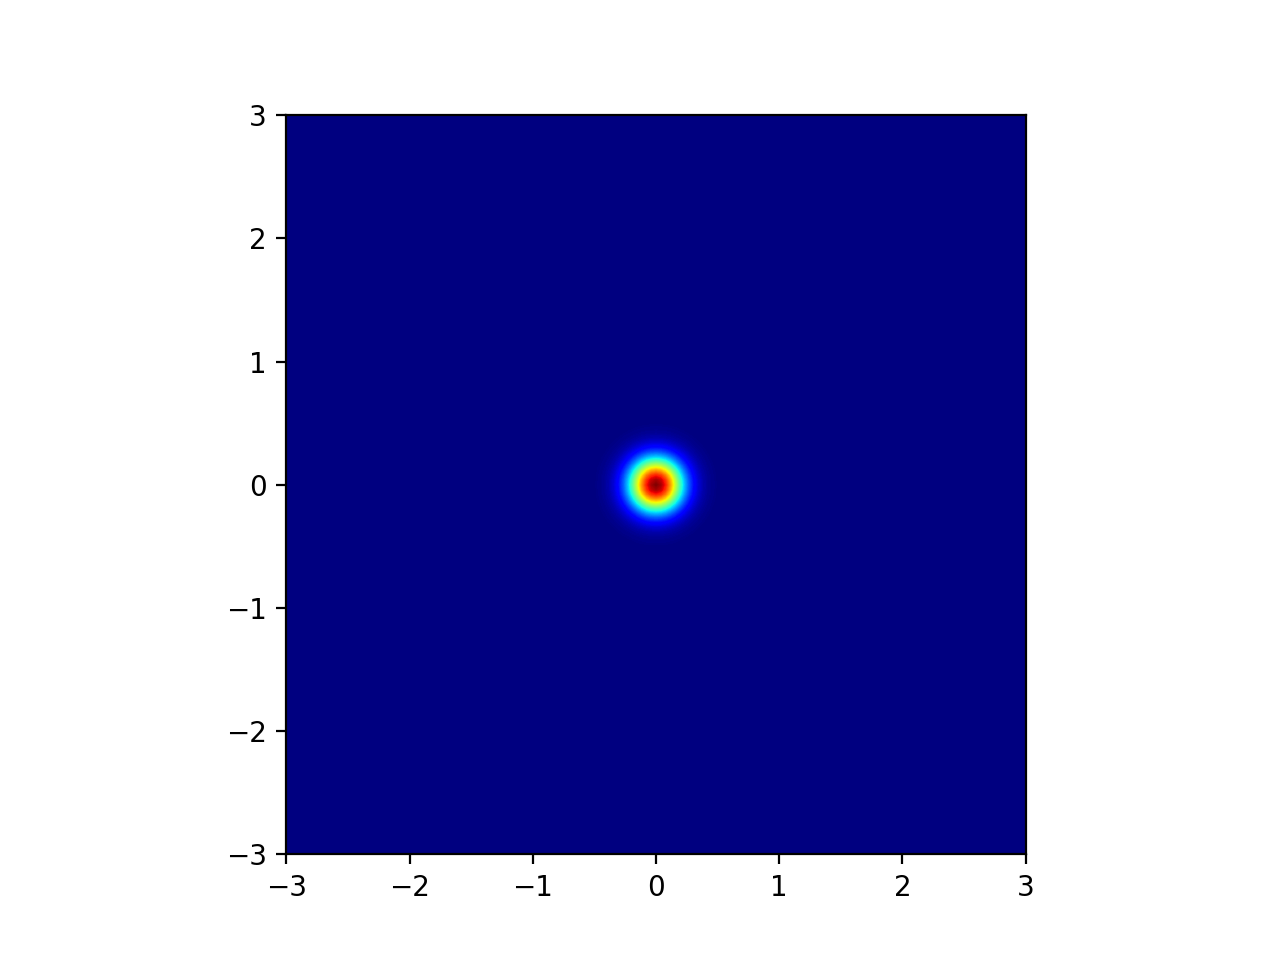

In [7]:
x = np.linspace(-3, 3, nx)
X, Y = np.meshgrid(x, x)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.contourf(X, Y, weight_2d[0,:,:], phi_levels, cmap='jet', extend='both')
ax1.set_aspect('equal')

fig1.savefig('delta_func_init_2d_18.png', bbox_inches='tight', dpi = 200.)

<IPython.core.display.Javascript object>


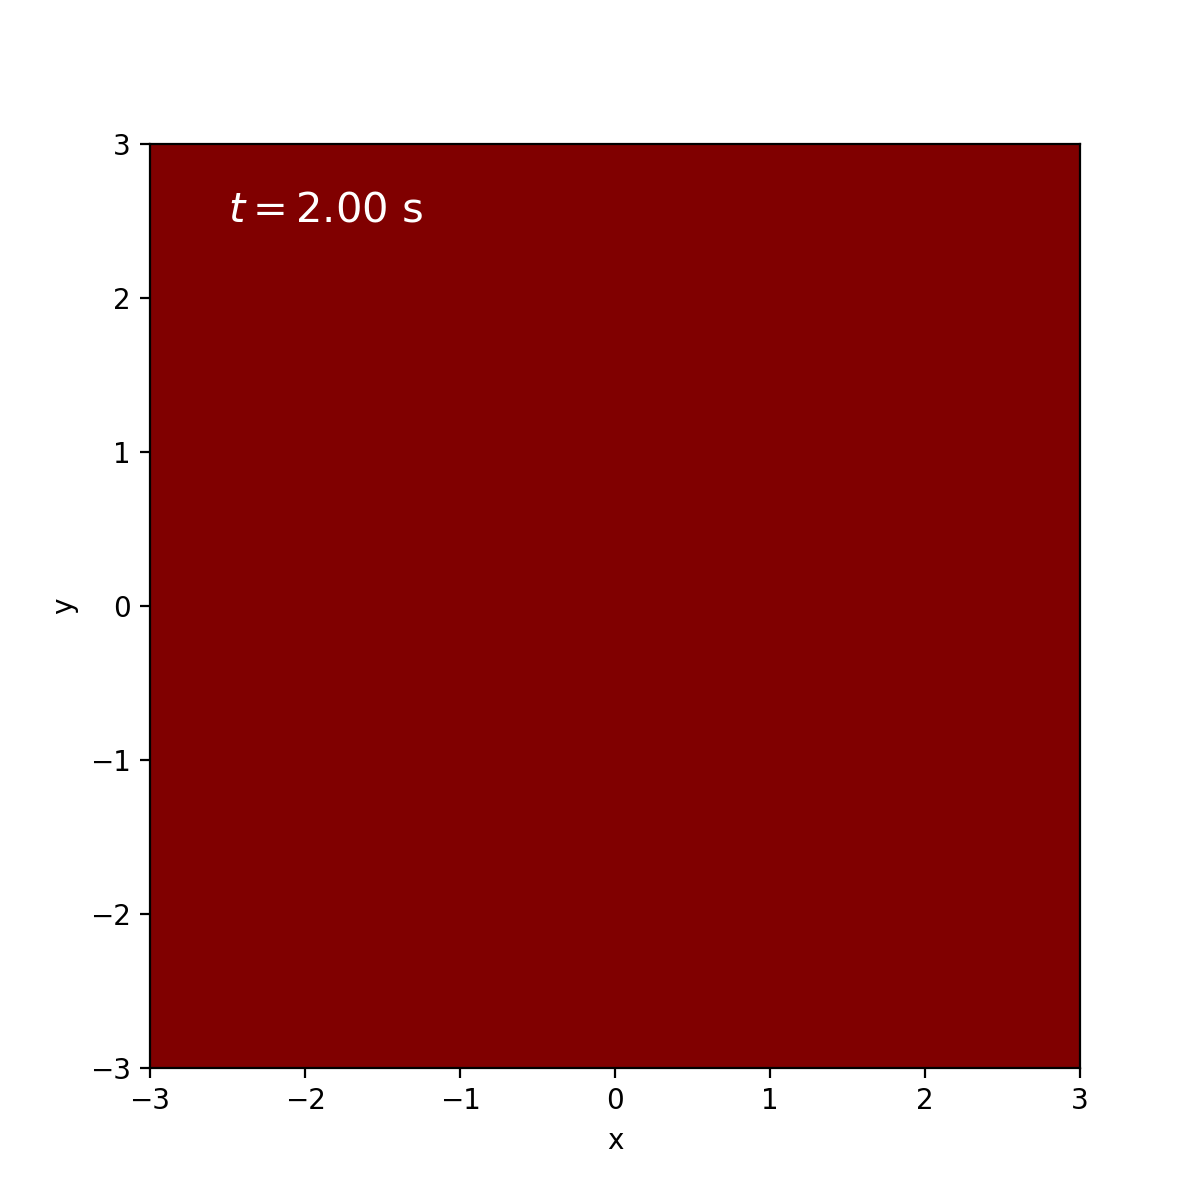

In [8]:
fig_anim = plt.figure(figsize=(6, 6))
ax_anim = fig_anim.add_subplot(1,1,1)
cont = ax_anim.contourf(X, Y, weight_2d[0,:,:], phi_levels, cmap='jet', extend='both')
time_text = ax_anim.text(-2.5, 2.5, r"$t = {0:4.2f}$ s".format(t_list[0]),
                      color="w", fontsize=15)
ax_anim.set_xlabel("x")
ax_anim.set_ylabel("y")
ax_anim.set_xlim([-3, 3])
ax_anim.set_ylim([-3, 3])

# animation function
def animate(i): 
    global cont, time_text
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = ax_anim.contourf(X, Y, weight_2d[i,:,:], phi_levels, cmap='jet', extend='both')
    time_text.set_text(r"$t = {0:4.2f}$ s".format(t_list[i]))
    return cont, time_text  
anim = animation.FuncAnimation(fig_anim, animate, frames=nt, repeat=False)
anim.save('delta_func_anim_2d_18.mp4', fps=2)

<IPython.core.display.Javascript object>


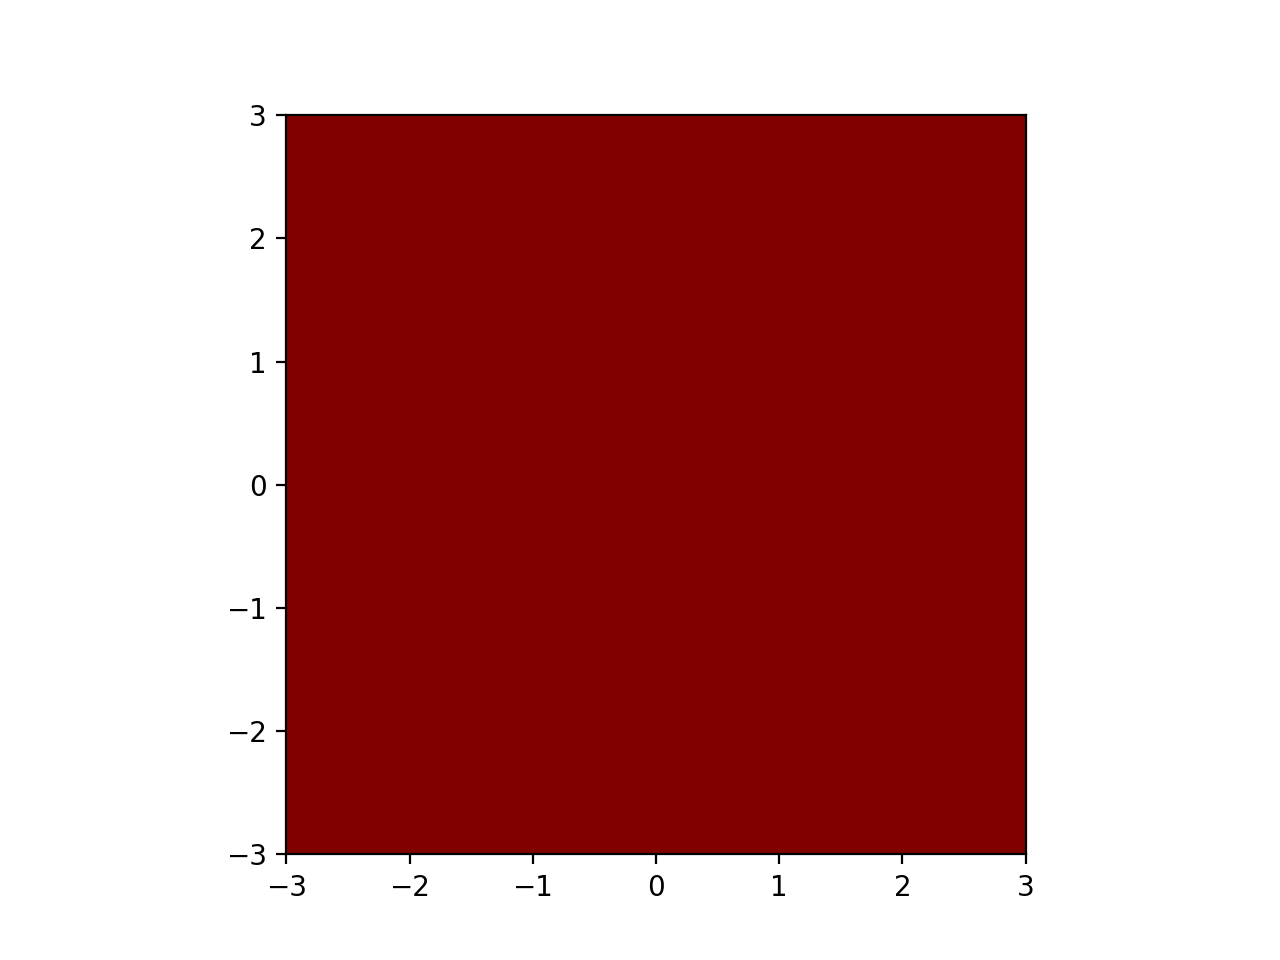

In [9]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.contourf(X, Y, weight_2d[nt-1,:,:], phi_levels, cmap='jet', extend='both')
ax2.set_aspect('equal')

fig2.savefig('delta_func_final_2d_18.png', bbox_inches='tight', dpi = 200.)